In [1]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Neon4\Machine learning code\Data set\SeoulBikeData.csv', encoding='latin1')

In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df['Seasons'] = df['Seasons'].astype(pd.CategoricalDtype())
df['Holiday'] = df['Holiday'].astype(pd.CategoricalDtype())
df['Functioning Day'] = df['Functioning Day'].astype(pd.CategoricalDtype())

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Check Null Value

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Date Transformation

In [8]:
# converting object to date time data type
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

# coverting day ,month,year format
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Weekday']=df['Date'].dt.day_name()

df['Weekday']=df['Weekday'].astype(pd.CategoricalDtype())

# droping date columns
df.drop('Date',axis=1, inplace=True)


In [9]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,Friday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,Friday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,Friday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,Friday


# EDA

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Month', ylabel='Rented Bike Count'>

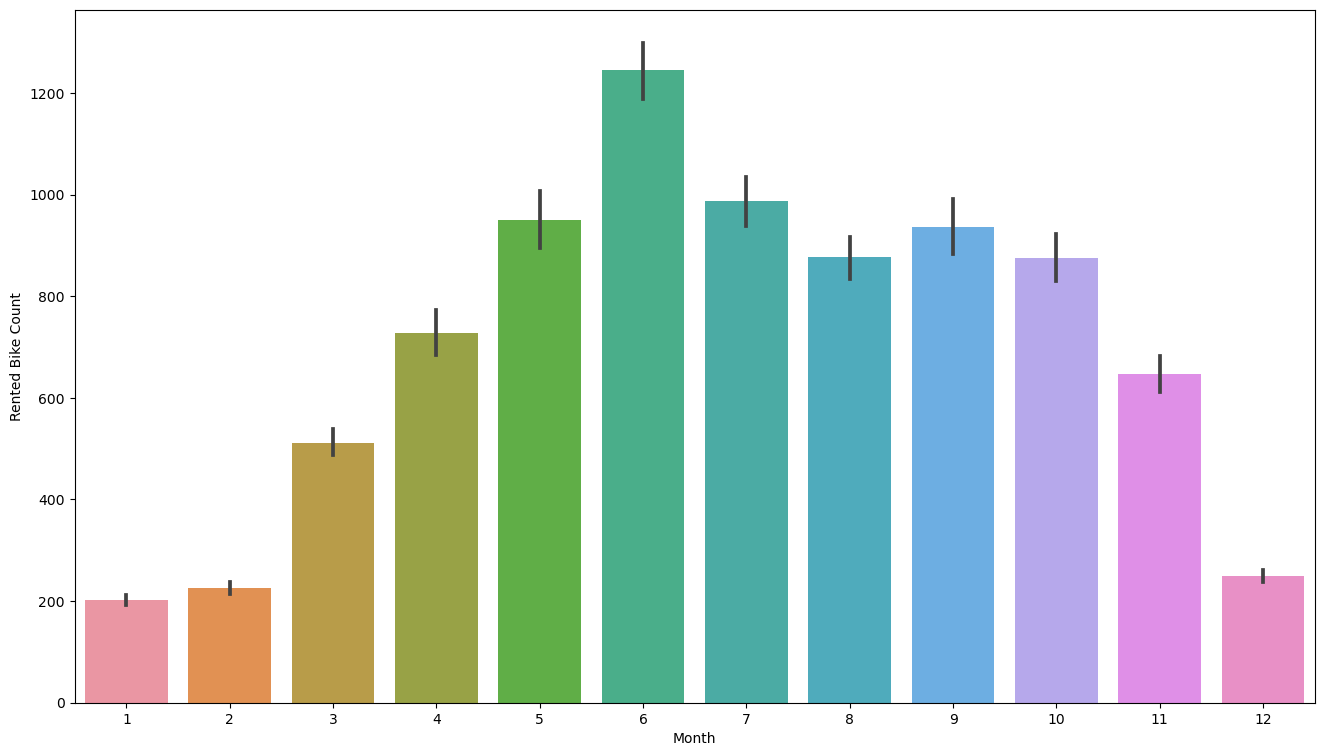

In [10]:
plt.figure(figsize=(16,9))
sns.barplot(x=df['Month'],y=df['Rented Bike Count'])

Text(0.5, 1.0, 'Rented Bike Count VS Month')

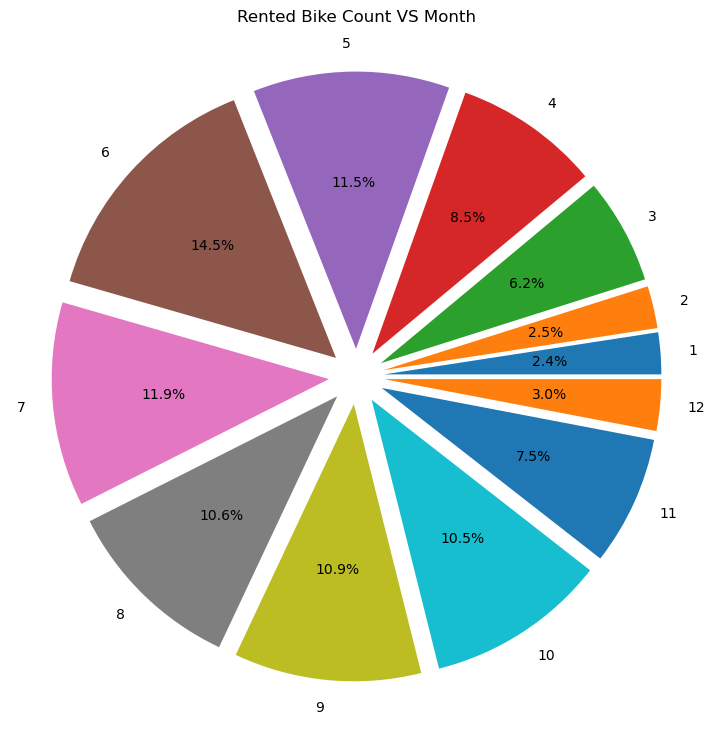

In [11]:
monthly_bike_counts = df.groupby('Month')['Rented Bike Count'].sum()
plt.figure(figsize=(16,9))
plt.pie(monthly_bike_counts, labels=monthly_bike_counts.index, autopct='%1.1f%%', explode=np.linspace(0.1,0.1,12))
plt.axis('off')
plt.title('Rented Bike Count VS Month')

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Day', ylabel='Rented Bike Count'>

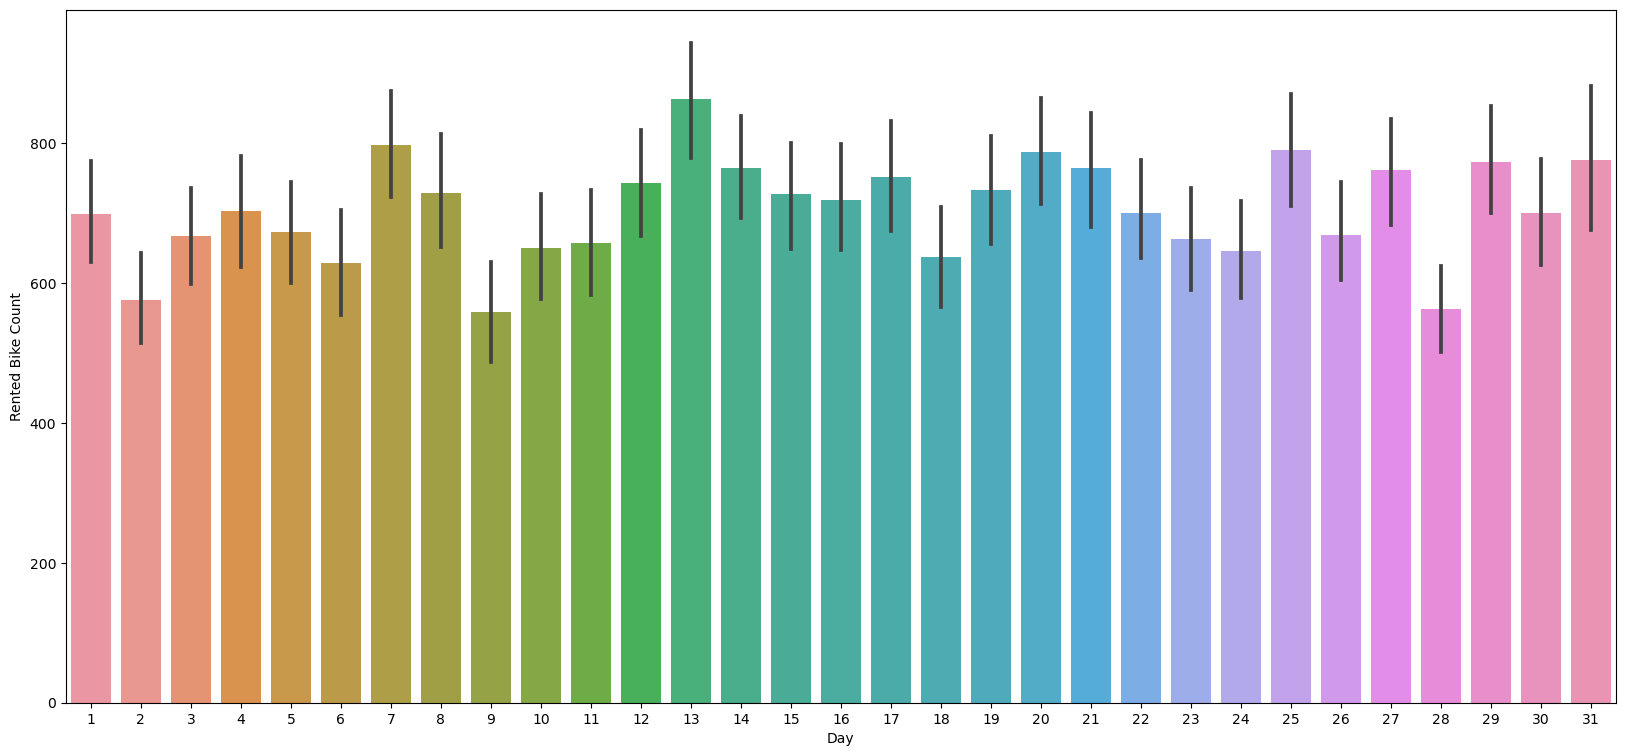

In [12]:
plt.figure(figsize=(20,9))
sns.barplot(x="Day",y='Rented Bike Count',data=df)

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

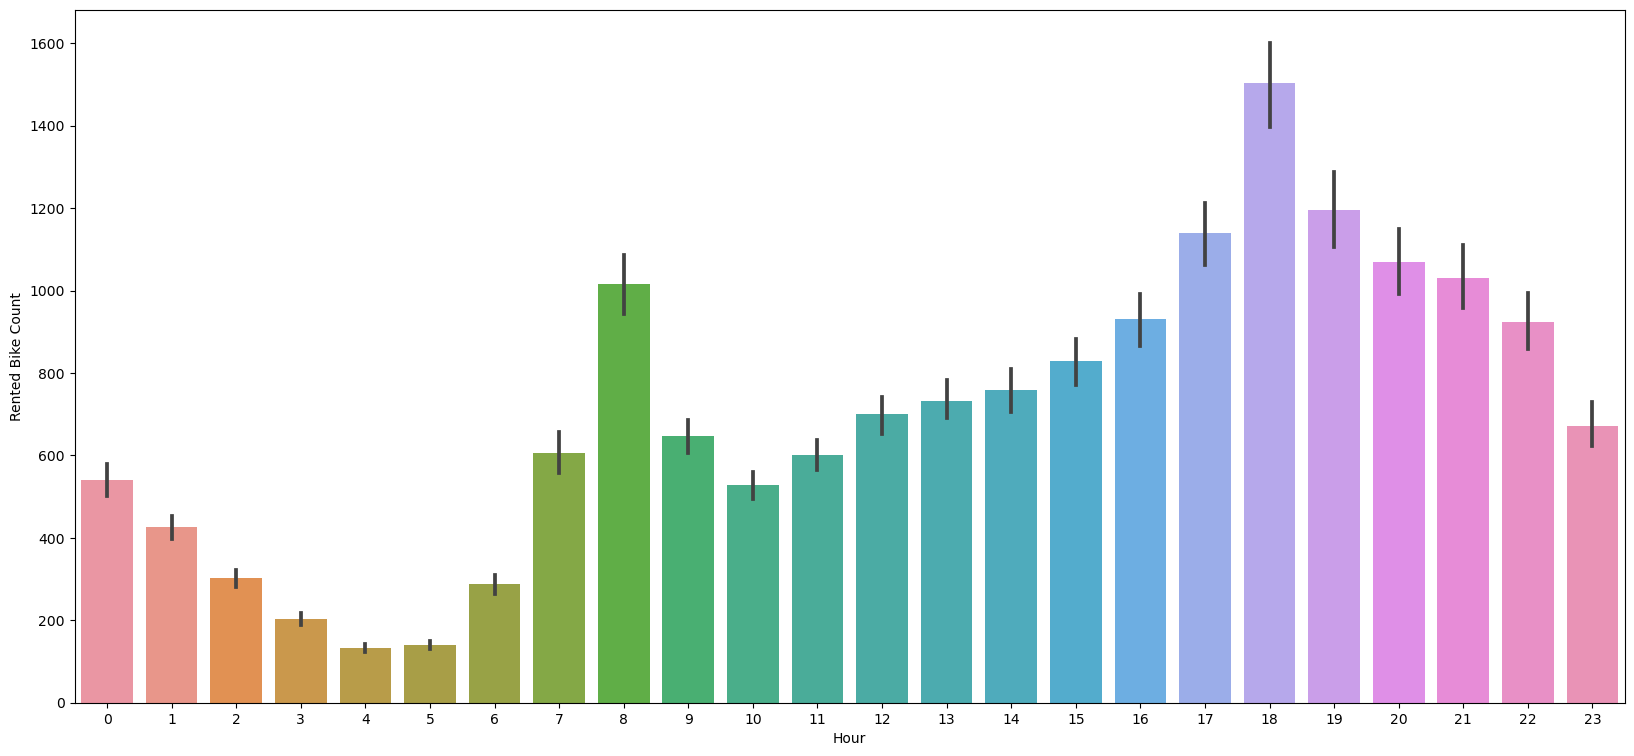

In [13]:
plt.figure(figsize=(20,9))
sns.barplot(x="Hour",y='Rented Bike Count',data=df)

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Weekday', ylabel='Rented Bike Count'>

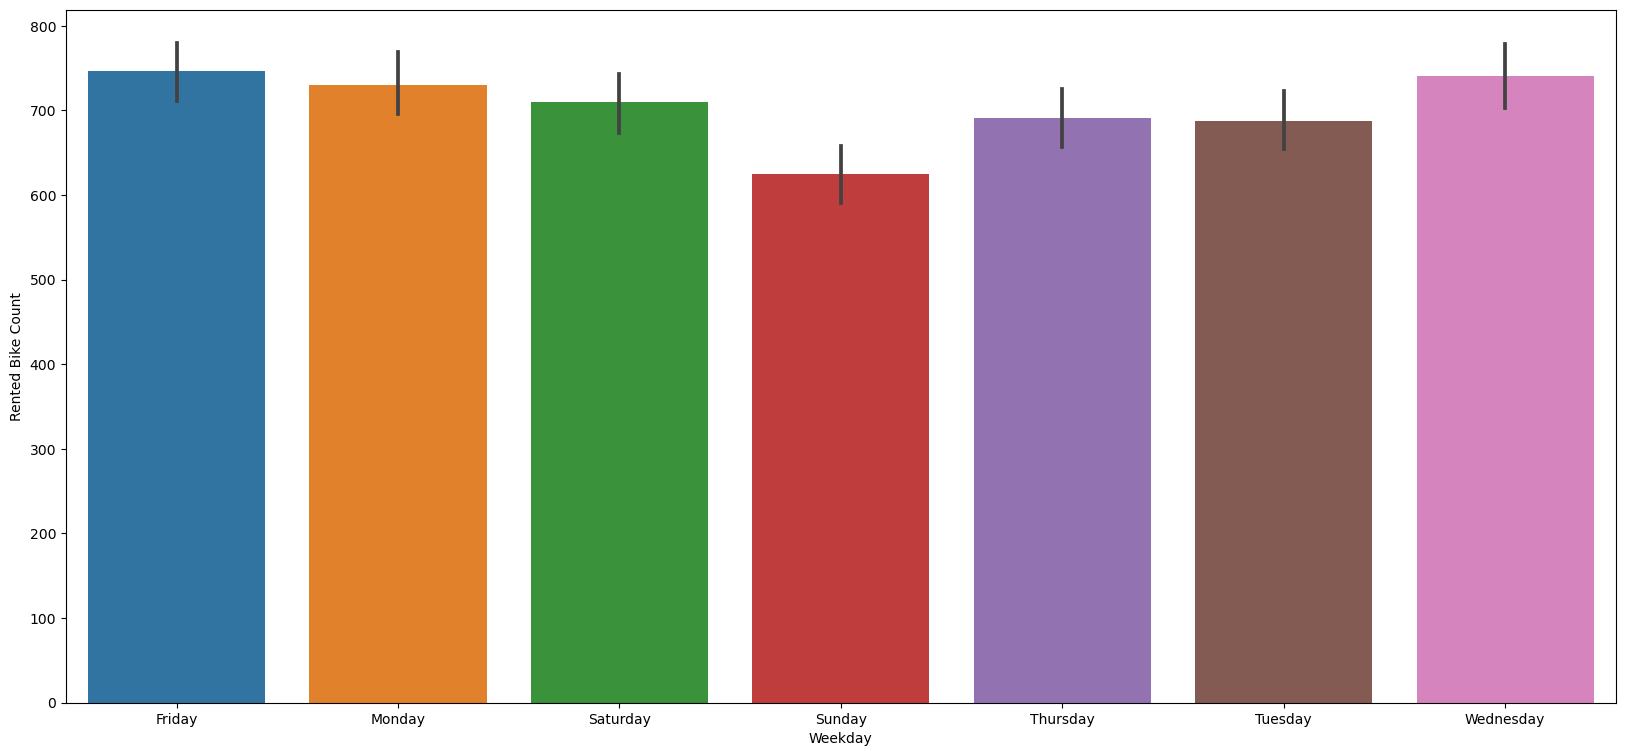

In [14]:
plt.figure(figsize=(20,9))
sns.barplot(x="Weekday",y='Rented Bike Count',data=df)

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

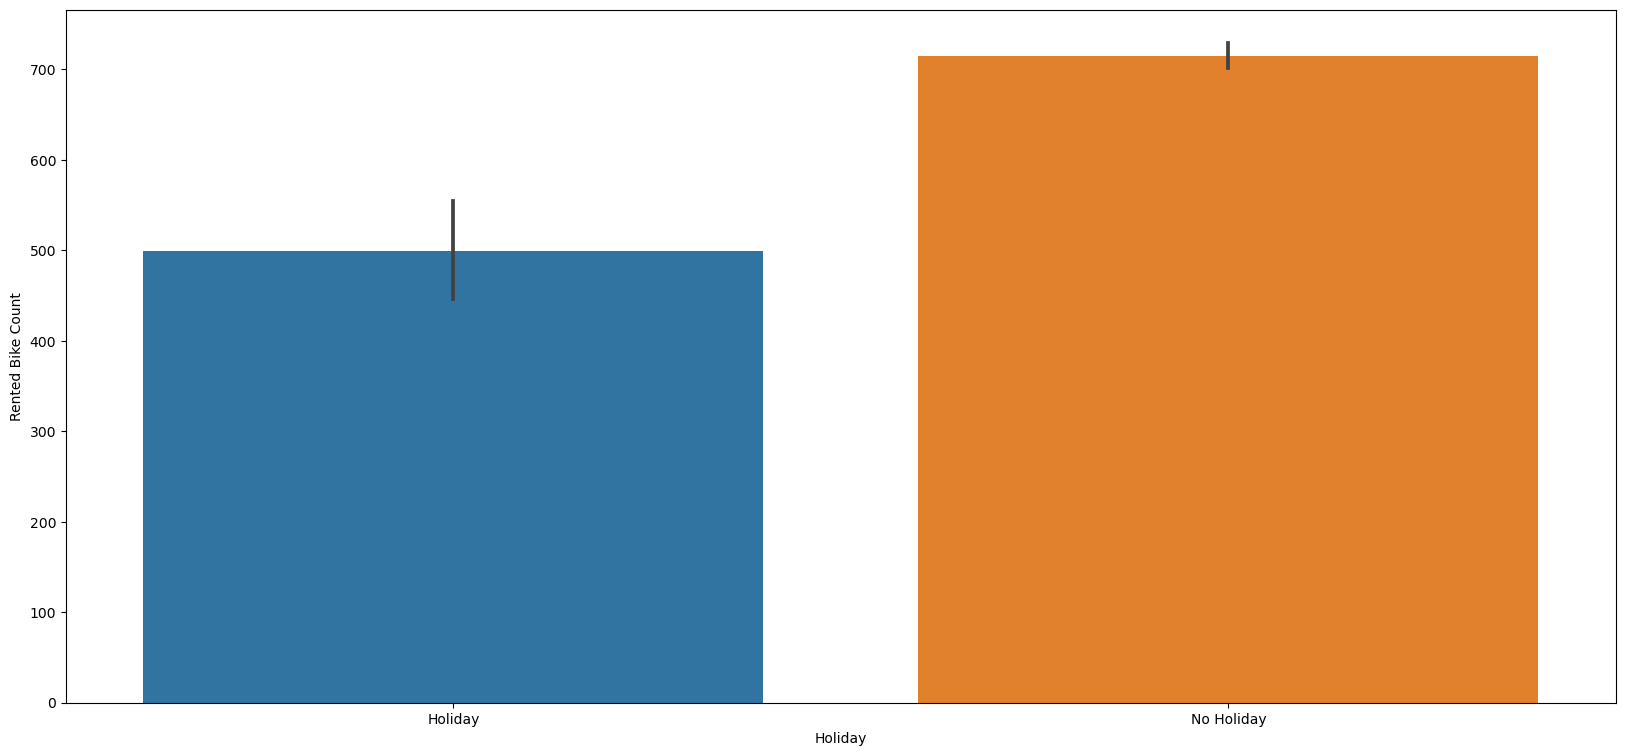

In [15]:
plt.figure(figsize=(20,9))
sns.barplot(x="Holiday",y='Rented Bike Count',data=df)

C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Neon4\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

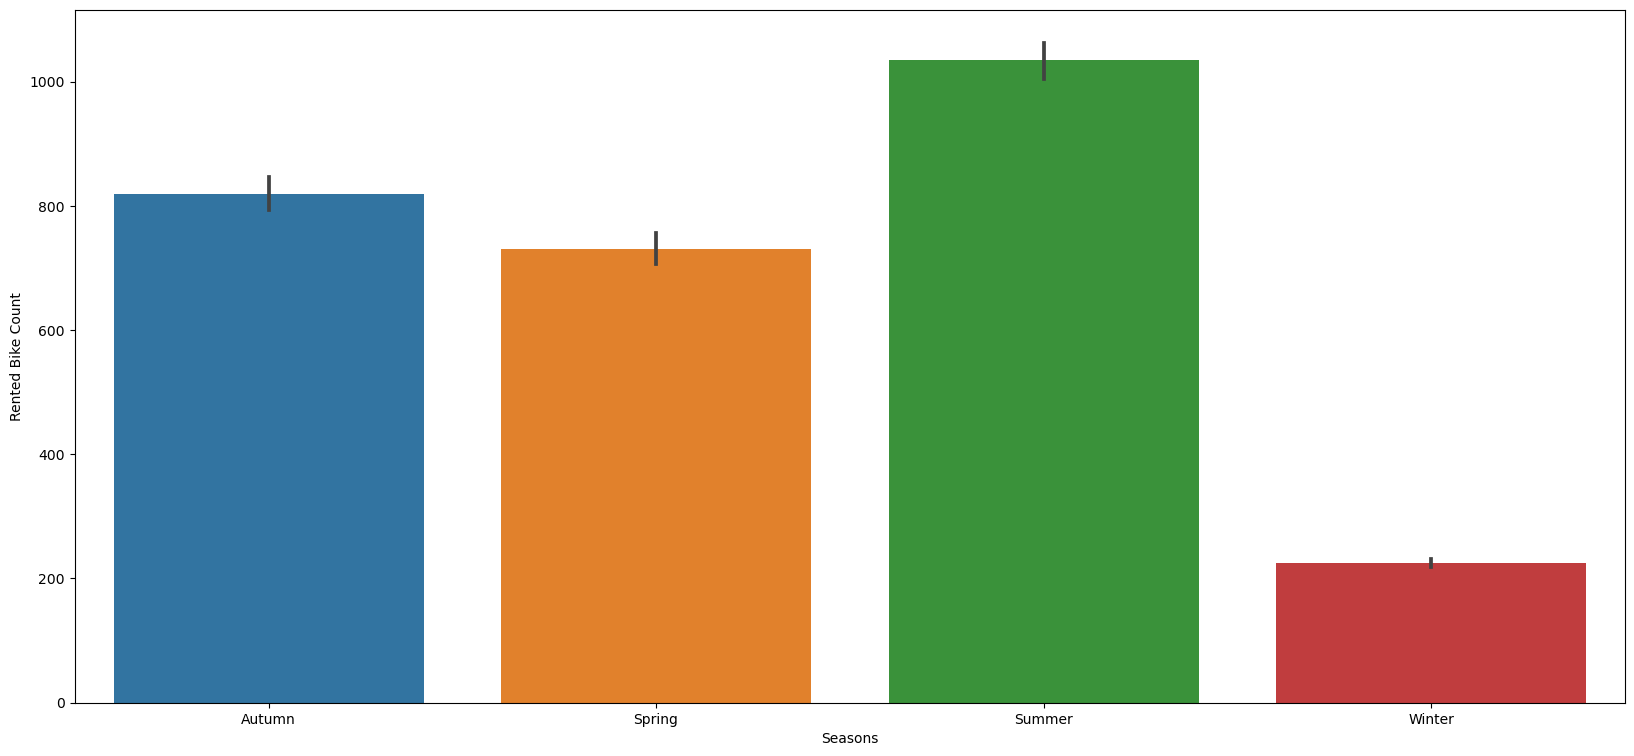

In [16]:
plt.figure(figsize=(20,9))
sns.barplot(x="Seasons",y='Rented Bike Count',data=df)


### Skewness

In [17]:
df.skew(numeric_only=True).sort_values()

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [18]:
df.corr(numeric_only=True)['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Day                          0.022291
Month                        0.133514
Year                         0.215162
Name: Rented Bike Count, dtype: float64

### Multicolinearity

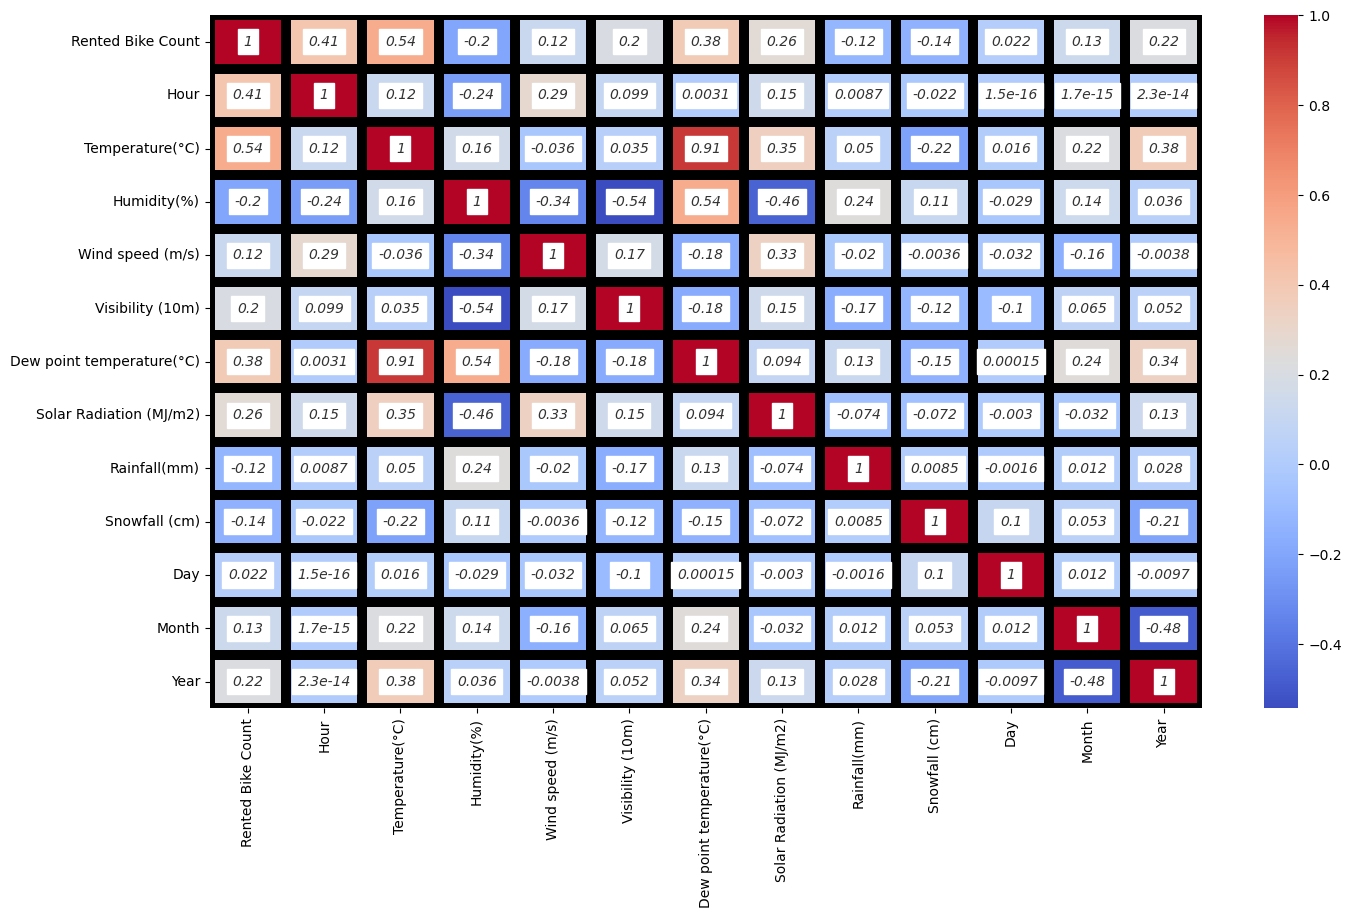

In [19]:
plt.figure(figsize=(16,9))
annot_kws={'fontsize':10,"fontstyle":"italic",'color':'k','alpha':0.8,'backgroundcolor':'w'}


sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', 
            annot=True,  
            annot_kws=annot_kws,
            linewidth=6,
            linecolor='k'
           )
plt.show()

### Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [21]:
ohe=OneHotEncoder()
oe=OrdinalEncoder()

In [22]:
data_trans_ohe=ohe.fit_transform(df[['Seasons','Weekday']]).toarray()
data_trans_oe=oe.fit_transform(df[['Holiday','Functioning Day']])

In [23]:
ohe.get_feature_names_out()


array(['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'], dtype=object)

In [24]:
oe.get_feature_names_out()

array(['Holiday', 'Functioning Day'], dtype=object)

In [25]:
df1=pd.DataFrame(data_trans_ohe,columns=['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Weekday_Friday', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'])

In [26]:
df[['Holiday', 'Functioning Day']]=data_trans_oe

In [27]:
df=pd.concat([df,df1],axis=1)


In [28]:
df.drop(['Seasons','Weekday'],axis=1,inplace=True)

In [29]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Outlier Detection

Text(0.5, 1.0, 'Snowfall (cm)')

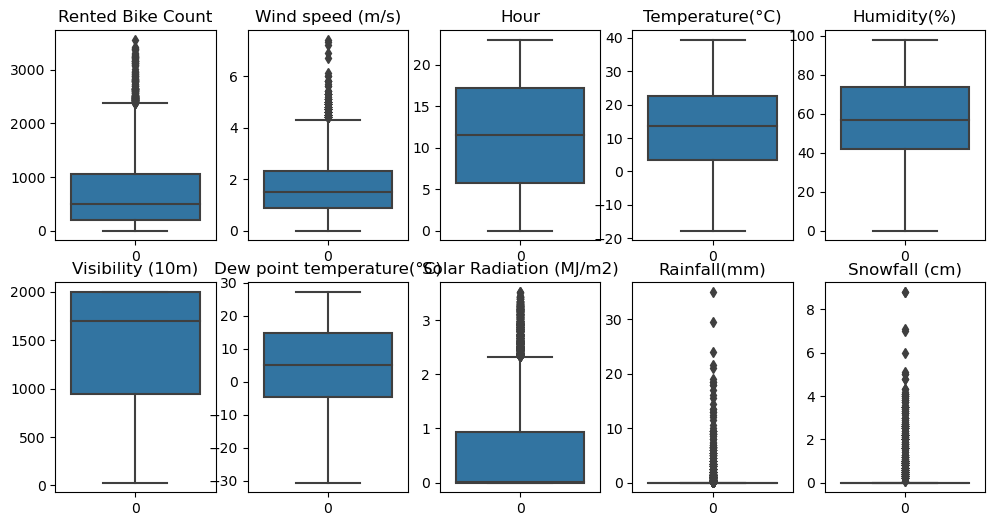

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
sns.boxplot(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(2,5,2)
sns.boxplot(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(2,5,3)
sns.boxplot(df['Hour'])
plt.title('Hour')

plt.subplot(2,5,4)
sns.boxplot(df['Temperature(°C)'])
plt.title('Temperature(°C)')

plt.subplot(2,5,5)
sns.boxplot(df['Humidity(%)'])
plt.title('Humidity(%)')

plt.subplot(2,5,6)
sns.boxplot(df['Visibility (10m)'])
plt.title('Visibility (10m)')

plt.subplot(2,5,7)
sns.boxplot(df['Dew point temperature(°C)'])
plt.title('Dew point temperature(°C)')

plt.subplot(2,5,8)
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')

plt.subplot(2,5,9)
sns.boxplot(df['Rainfall(mm)'])
plt.title('Rainfall(mm)')

plt.subplot(2,5,10)
sns.boxplot(df['Snowfall (cm)'])
plt.title('Snowfall (cm)')

Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

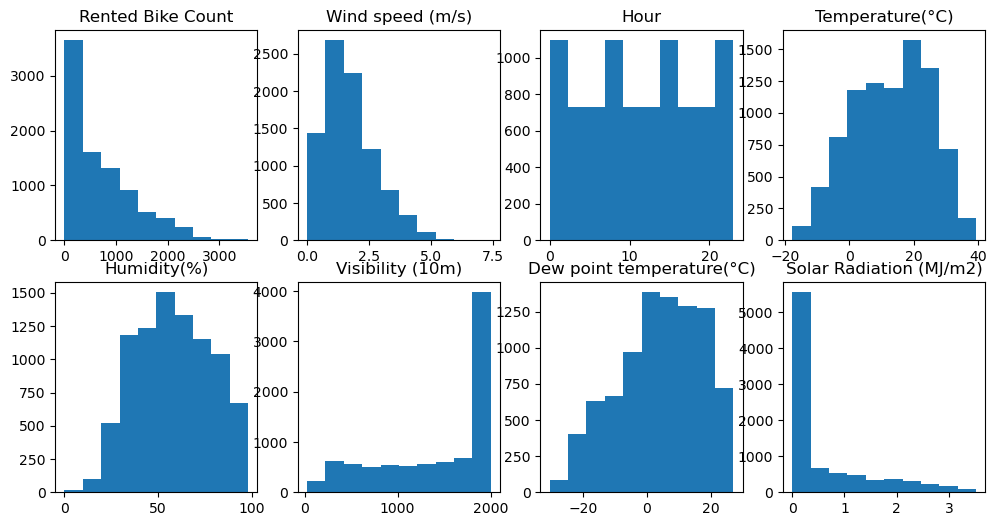

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
plt.hist(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(2,4,2)
plt.hist(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(2,4,3)
plt.hist(df['Hour'])
plt.title('Hour')

plt.subplot(2,4,4)
plt.hist(df['Temperature(°C)'])
plt.title('Temperature(°C)')

plt.subplot(2,4,5)
plt.hist(df['Humidity(%)'])
plt.title('Humidity(%)')

plt.subplot(2,4,6)
plt.hist(df['Visibility (10m)'])
plt.title('Visibility (10m)')

plt.subplot(2,4,7)
plt.hist(df['Dew point temperature(°C)'])
plt.title('Dew point temperature(°C)')

plt.subplot(2,4,8)
plt.hist(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')

### Feature Transformation

In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
pt = PowerTransformer(method='yeo-johnson') 

In [34]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data_trans=pt.fit_transform(df[['Wind speed (m/s)','Solar Radiation (MJ/m2)']])

In [36]:
pt.lambdas_

array([-0.01504721, -2.01350591])

In [37]:
df[['Wind speed (m/s)','Solar Radiation (MJ/m2)']]=data_trans

Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

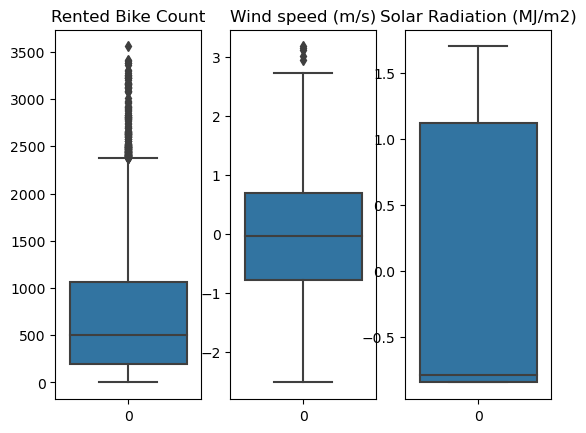

In [38]:
plt.subplot(1,3,1)
sns.boxplot(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(1,3,2)
sns.boxplot(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(1,3,3)
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')

Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

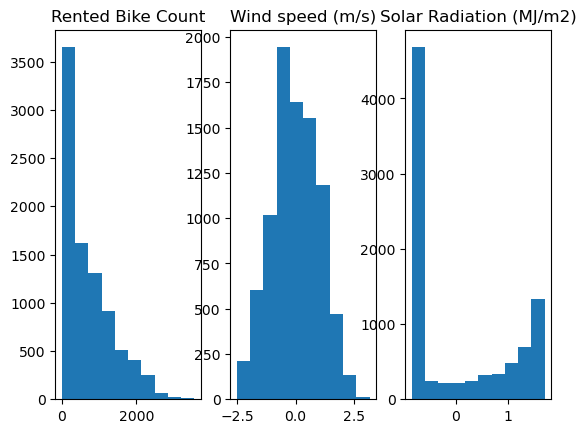

In [39]:
plt.subplot(1,3,1)
plt.hist(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(1,3,2)
plt.hist(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(1,3,3)
plt.hist(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')


### Outlier Removal

In [42]:
percentil1_75_wind=df['Wind speed (m/s)'].quantile(0.75)
percentil1_25_wind=df['Wind speed (m/s)'].quantile(0.25)
iqr_wind=percentil1_75_wind-percentil1_25_wind

percentil1_75_bike=df['Rented Bike Count'].quantile(0.75)
percentil1_25_bike=df['Rented Bike Count'].quantile(0.25)
iqr_bike=percentil1_75_bike-percentil1_25_bike

In [43]:
upper_lmit_wind=percentil1_75_wind+1.5*iqr_wind
lower_lmit_wind=percentil1_75_wind-1.5*iqr_wind

upper_lmit_bike=percentil1_75_bike+1.5*iqr_bike
lower_lmit_bike=percentil1_75_bike-1.5*iqr_bike

In [44]:
print('upper_lmit_wind',upper_lmit_wind)
print('lower_lmit_wind',lower_lmit_wind)
print('upper_lmit_bike',upper_lmit_bike)
print('lower_lmit_bike',lower_lmit_bike)



upper_lmit_wind 2.917764397850071
lower_lmit_wind -1.5173967038342153
upper_lmit_bike 2376.625
lower_lmit_bike -246.125


In [45]:
df_outlers=df[ (df['Wind speed (m/s)'] >upper_lmit_wind) | (df['Wind speed (m/s)'] <lower_lmit_wind) |(df['Rented Bike Count']>upper_lmit_bike) ]
df_outlers

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
107,334,11,-3.9,25,-2.512538,1959,-21.0,-0.845761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108,321,12,-2.3,25,-2.512538,1962,-19.7,-0.845761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109,325,13,-1.6,27,-2.512538,1955,-18.2,-0.845761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
110,334,14,-1.1,28,-2.512538,2000,-17.3,-0.845761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111,353,15,-0.7,28,-2.512538,2000,-16.9,-0.845761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,796,7,2.5,24,-2.018187,1306,-16.0,-0.845761,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8714,319,2,2.1,28,-1.601277,1981,-14.5,-0.845761,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8724,661,12,5.6,27,-1.801586,1522,-11.9,0.344472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8740,116,4,-0.5,71,-1.601277,1345,-5.1,-0.845761,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df=df[ (df['Wind speed (m/s)'] <upper_lmit_wind) &(df['Wind speed (m/s)'] >lower_lmit_wind)&(df['Rented Bike Count']<upper_lmit_bike) ]

In [48]:
df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

C:\Users\Neon4\AppData\Local\Temp\ipykernel_30712\567197162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)


Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

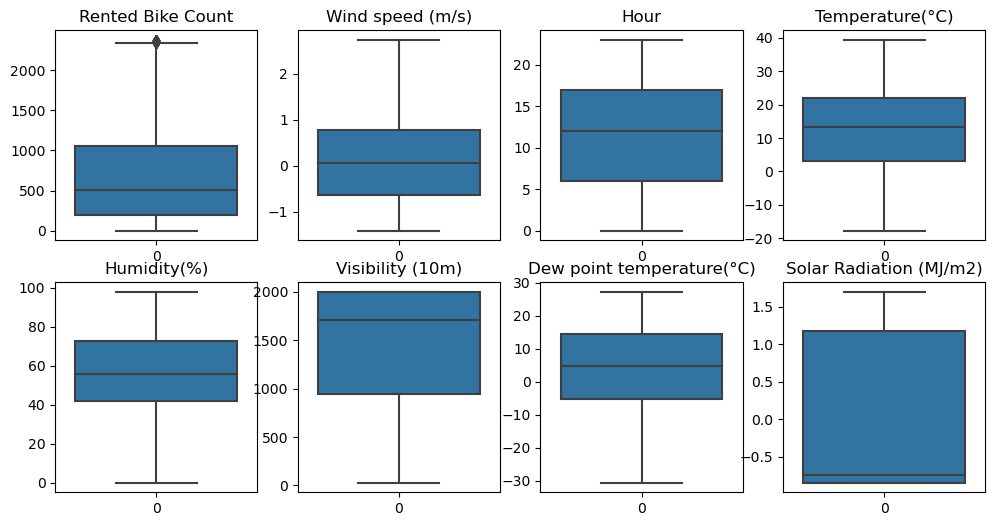

In [49]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
sns.boxplot(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(2,4,2)
sns.boxplot(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(2,4,3)
sns.boxplot(df['Hour'])
plt.title('Hour')

plt.subplot(2,4,4)
sns.boxplot(df['Temperature(°C)'])
plt.title('Temperature(°C)')

plt.subplot(2,4,5)
sns.boxplot(df['Humidity(%)'])
plt.title('Humidity(%)')

plt.subplot(2,4,6)
sns.boxplot(df['Visibility (10m)'])
plt.title('Visibility (10m)')

plt.subplot(2,4,7)
sns.boxplot(df['Dew point temperature(°C)'])
plt.title('Dew point temperature(°C)')

plt.subplot(2,4,8)
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')


Text(0.5, 1.0, 'Solar Radiation (MJ/m2)')

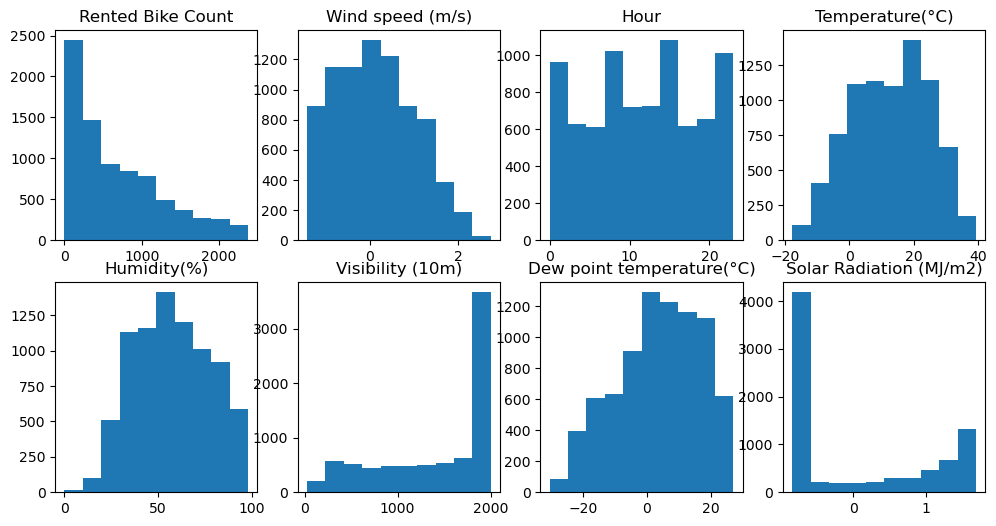

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(2,4,1)
plt.hist(df['Rented Bike Count'])
plt.title('Rented Bike Count')

plt.subplot(2,4,2)
plt.hist(df['Wind speed (m/s)'])
plt.title('Wind speed (m/s)')

plt.subplot(2,4,3)
plt.hist(df['Hour'])
plt.title('Hour')

plt.subplot(2,4,4)
plt.hist(df['Temperature(°C)'])
plt.title('Temperature(°C)')

plt.subplot(2,4,5)
plt.hist(df['Humidity(%)'])
plt.title('Humidity(%)')

plt.subplot(2,4,6)
plt.hist(df['Visibility (10m)'])
plt.title('Visibility (10m)')

plt.subplot(2,4,7)
plt.hist(df['Dew point temperature(°C)'])
plt.title('Dew point temperature(°C)')

plt.subplot(2,4,8)
plt.hist(df['Solar Radiation (MJ/m2)'])
plt.title('Solar Radiation (MJ/m2)')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8044 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8044 non-null   int64  
 1   Hour                       8044 non-null   int64  
 2   Temperature(°C)            8044 non-null   float64
 3   Humidity(%)                8044 non-null   int64  
 4   Wind speed (m/s)           8044 non-null   float64
 5   Visibility (10m)           8044 non-null   int64  
 6   Dew point temperature(°C)  8044 non-null   float64
 7   Solar Radiation (MJ/m2)    8044 non-null   float64
 8   Holiday                    8044 non-null   float64
 9   Functioning Day            8044 non-null   float64
 10  Day                        8044 non-null   int32  
 11  Month                      8044 non-null   int32  
 12  Year                       8044 non-null   int32  
 13  Seasons_Autumn             8044 non-null   float64
 1

In [53]:
df.corr(numeric_only=True)['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.389736
Temperature(°C)              0.553974
Humidity(%)                 -0.189598
Wind speed (m/s)             0.107774
Visibility (10m)             0.192170
Dew point temperature(°C)    0.398548
Solar Radiation (MJ/m2)      0.305003
Holiday                      0.072533
Functioning Day              0.211591
Day                          0.021216
Month                        0.151565
Year                         0.225040
Seasons_Autumn               0.124746
Seasons_Spring               0.034757
Seasons_Summer               0.298555
Seasons_Winter              -0.449398
Weekday_Friday               0.022139
Weekday_Monday               0.009886
Weekday_Saturday             0.016063
Weekday_Sunday              -0.036632
Weekday_Thursday            -0.013837
Weekday_Tuesday             -0.010558
Weekday_Wednesday            0.012532
Name: Rented Bike Count, dtype: float64

### Spliting and Scalling the data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Rented Bike Count',axis=1),df['Rented Bike Count'],test_size=0.2)

In [56]:
from sklearn.preprocessing import StandardScaler 

In [57]:
sc=StandardScaler()

In [58]:
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

## Traning Models and Feature selection

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn. import 
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [87]:

class Regression:
    def __init__(self, x_train, x_test, y_train, y_test, *models):
        self.models = models
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
        
    def Result(self):
        for i in self.models:
            i.fit(self.x_train, self.y_train)
            y_pred = i.predict(self.x_test)
           
            self.k=len(df.columns)
            self.n=df.shape[0]
            self.r2_adj=1-((1-(r2_score(self.y_test, y_pred)))*(self.n-1)/(self.n-self.k-1))
            print(i)
            print('rmse', np.sqrt(mean_squared_error(self.y_test, y_pred)))
            print('mse', mean_squared_error(self.y_test, y_pred))
            print('r2_score', r2_score(self.y_test, y_pred))
            print('r_adj',self.r2_adj)


In [103]:
en=ElasticNet()
sgd=SGDRegressor()
svr=SVR()
ad=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
rf=RandomForestRegressor(n_jobs=-1)


In [89]:
model=Regression(X_train,X_test,y_train,y_test,en,sgd,svr,ad,gbr,rf)

In [90]:
model.Result()

ElasticNet()
rmse 399.87486993030666
mse 159899.91160177966
r2_score 0.5294867611382688
r_adj 0.5280785658854091
SGDRegressor()
rmse 389.0651600236386
mse 151371.69874421952
r2_score 0.5545814407607697
r_adj 0.5532483511708282
SVR()
rmse 511.13687359987944
mse 261260.90355345915
r2_score 0.23122713022492802
r_adj 0.22892627614404493
AdaBoostRegressor()
rmse 329.39808359624595
mse 108503.09747687944
r2_score 0.6807243774623295
r_adj 0.6797688200435861
GradientBoostingRegressor()
rmse 229.9536202196891
mse 52878.667452141
r2_score 0.8444019584478472
r_adj 0.8439362703324648
RandomForestRegressor()
rmse 183.61475726153876
mse 33714.3790842138
r2_score 0.9007938056987075
r_adj 0.9004968922851608


# Hyper Parameter Tunning

In [101]:
from sklearn.model_selection import GridSearchCV
import time

In [102]:

max_features=['auto','sqrt']

max_depth=[5,10,15,20,25,30]

min_samples_split=[2,5,10]

min_samples_leaf=[1,2,3,4,5]

bootstrap=[True,False]

grid={  'max_features':max_features,
             "max_depth":max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap      
}

In [106]:
gsc=GridSearchCV(estimator=rf,param_grid=grid,scoring='r2',pre_dispatch=-2,cv=2)

In [107]:
gsc.fit(X_train,y_train)

C:\Users\Neon4\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Neon4\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neon4\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Neon4\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Neon4\anaconda3\Lib\site-packag

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10]},
             pre_dispatch=-2, scoring='r2')

In [108]:
y_gsc_pred=gsc.predict(X_test)

In [109]:
mean_squared_error(y_test,y_gsc_pred)

35153.164018455354

In [110]:
r2_score(y_test,y_gsc_pred)

0.8965601113041702

In [125]:
xgb=XGBRegressor(n_jobs=-1)

In [126]:
xgb.fit(x_train,y_train)

C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [131]:
y_xgbr_pred=xgb.predict(x_test)

C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [128]:
r2_score(y_test,y_xgbr_pred)

0.9237757815855514

In [129]:
np.sqrt(mean_squared_error(y_test,y_xgbr_pred))

160.94766408271346

In [136]:
parms={'max_depth':[3,5,10,12,15,17,20],
       'learning_rate':[0.01,0.05,0.1,0.2,0.3],
       "n_estimators":[50,100,150,200]
      }

In [139]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
xgb_grid=RandomizedSearchCV(estimator=xgb,param_distributions=parms,n_jobs=-1,cv=3,n_iter=50)

In [142]:
xgb_grid.fit(x_train,y_train)

C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 10, 12, 15, 17, 20],
                                        'n_estimators': [50, 100, 150, 200]})

In [143]:
y_xgb_grid_pred=xgb_grid.predict(x_test)

C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [145]:
np.sqrt(mean_squared_error(y_test,y_xgb_grid_pred))

168.02504240732986

In [147]:
r2_score(y_test,y_xgb_grid_pred)

0.9169247510450782

In [148]:
xgb_grid.best_params_

{'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}

In [149]:
xgb_grid.best_score_

0.9150801227995199

In [183]:
xgb=XGBRegressor(n_estimators=80,max_depth=10,learning_rate=0.3)
xgb.fit(x_train,y_train)

C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [184]:
print('rmse',np.sqrt(mean_squared_error(y_test,xgb.predict(x_test))))
print('r2',r2_score(y_test,xgb.predict(x_test)))

rmse 164.5138721541187
r2 0.9203604728203457


C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Neon4\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

# save Model

In [185]:
import pickle
import os

In [186]:
dir=r'C:\Users\Neon4\Machine learning code\project code\souel bike demand project\models'

In [187]:
model_file_name='XGBoostRegressor_r2_0_938_v1.pkl'

model_file_path=os.path.join(dir,model_file_name)
model_file_path

'C:\\Users\\Neon4\\Machine learning code\\project code\\souel bike demand project\\models\\XGBoostRegressor_r2_0_938_v1.pkl'

In [193]:
pickle.dump(xgb,open(model_file_path,'wb'))

In [192]:
pt_path="C:\\Users\\Neon4\\Machine learning code\\project code\\souel bike demand project\\models\\pt_transformer.pkl"

In [189]:
pt.lambdas_

array([-0.01504721, -2.01350591])

In [194]:
pickle.dump(pt,open(pt_path,'wb'))